## Before you start
Make a copy of this Colab by clicking on File > Save a Copy in Drive
Input your student id, first name, and last name

In [1]:
#@title  { run: "auto", display-mode: "form" }
student_id = "80683116" #@param {type:"string"}
first_name = "Salvador" #@param {type:"string"}
last_name = "Robles Herrera" #@param {type:"string"}

## Download NES Music Dataset

In [2]:
from urllib import request

# MIDI are music files that look like Piano titles. Showsing where one note starts
# and when a note ends.

nes_midi_url = "http://deepyeti.ucsd.edu/cdonahue/nesmdb/nesmdb_midi.tar.gz"
nes_midi_tar_path = "nesmdb_midi.tar.gz"

nes_exprsco_url = "http://deepyeti.ucsd.edu/cdonahue/nesmdb/nesmdb24_exprsco.tar.gz"
nes_exprsco_tar_path = "nesmdb24_exprsco.tar.gz"

def download_ds(url, store_path):
  response = request.urlretrieve(url, store_path)


download_ds(nes_midi_url, nes_midi_tar_path)
download_ds(nes_exprsco_url, nes_exprsco_tar_path)

midi_train_path = "nesmdb_midi/train/"
exprsco_train_path = "nesmdb24_exprsco/train/"


## Decompress 

In [3]:
import tarfile

def decompress(path):
  tar = tarfile.open(path)
  tar.extractall()
  tar.close()

decompress(nes_midi_tar_path)
decompress(nes_exprsco_tar_path)

## Split Dataset 

In [4]:
import os
from collections import defaultdict

"""
This is listing a specific game matched with the songs associated with them.
Each game has a set of songs that appear in that game.
"""

def get_video_game_dataset(num_top_games):
  dir_list = os.listdir(midi_train_path)
  
  game_tracks = defaultdict(list)
  for mid_file in dir_list:
    game_id = mid_file[:3]
    game_tracks[game_id].append(mid_file)
    
  game_tracks = {k: v for k, v in sorted(game_tracks.items(), key=lambda item: len(item[1]), reverse=True)}

  key_iterator = iter(game_tracks)

  game_tracks_sub = {}
  for _ in range(num_top_games):
    video_game = next(key_iterator)  
    game_tracks_sub[video_game] = game_tracks[video_game]

  return game_tracks_sub


num_top_games = 10
game_tracks = get_video_game_dataset(num_top_games)
  

## Play some tracks

### Install Dependencies

In [5]:
"""
Magenta is created by Google. To make music and art with Machine Learning
"""

!pip install -qU magenta

### Play some tracks

In [6]:
import note_seq

"""
Note sequence is how you want to represent our input.
Where you see songs starting and ending in a sequence. Separated by musical instruments
"""

games_sub = ["135", "119", "091", "229"] # Note that this keys are from the Top 10 videogames with more songs associated with them
for game_id in games_sub:
  tracks = game_tracks[game_id]
  first_track = note_seq.midi_file_to_note_sequence(midi_train_path + "/" + tracks[0])
  print(f'Track Name: {tracks[0]}')
  note_seq.play_sequence(first_track)

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB thr

Track Name: 135_GanbareGoemonGaiden2_TenkanoZaih__38_39TowerofBabel.mid


Track Name: 119_FinalFantasyIII_04_05CrystalRoom.mid


Track Name: 091_DragonWarriorIV_14_15LevelUp.mid


Track Name: 229_MegaMan6_05_06GameStart.mid


In [7]:
# Top 10 videogames with songs asssociates
print(game_tracks)
# There are only 10 keys. Which are the top 10 games with more songs.
print(game_tracks.keys())

{'135': ['135_GanbareGoemonGaiden2_TenkanoZaih__38_39TowerofBabel.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__91_92FinalBoss.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__44_45ShipTravel.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__29_30TempleSchool.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__07_08Shop.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__63_64AntarcticResearchVesselTravel.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__77_78TobunbeeTravel.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__05_06TownofOedo.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__59_60Submarine.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__50_51NotenOndoInstructionPart2.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__23_24Village.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__84_85BridgetotheMoon.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__46_47DevilsForest.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__71_72KuimonmonCityPayaKingdom.mid', '135_GanbareGoemonGaiden2_TenkanoZaih__10_11Dungeon.mid', '135_GanbareGoemonGaiden2_T

## Read NumPy representations

In [8]:
import numpy as np
"""
Numpy array stored as a pickle object. Pickle files and swap with batches
when you have a lot of data.

N is the length of the song. 4 is the number of instruments. We can treat 
them like pictures!! LIke RGB image representation.

Pickle is a way to allow us to serialize Python objs
"""
game_tracks_np = defaultdict(list)

tss = []
for game_id in game_tracks:  
  for track in game_tracks[game_id]:
    exprsco_path = exprsco_train_path + track.replace(".mid",".exprsco.pkl")
    np_rep = np.load(exprsco_path, allow_pickle=True)[2]

    game_tracks_np[game_id].append(np_rep)
    tss.append(np_rep.shape[0])

print(game_tracks_np.keys())

dict_keys(['135', '119', '091', '378', '191', '246', '042', '276', '233', '229'])


## Train-Test Split



In [9]:
"""
460 is a middle number. Not too high or too low. Was good number in order to
classify. Number of steps.
Trial and error to find the 460.
"""

def train_test_split(game_tracks_np, max_timesteps=460, test_ratio=0.2):
  x_train_lst = []
  y_train_lst = []

  x_test_lst = []
  y_test_lst = []

  test_game_tracks = []

  for class_id, game_id in enumerate(game_tracks_np):
    print('class_id', class_id)
    print('game_id', game_id)
    tracks_lst = game_tracks_np[game_id]
    print('len(tracks_lst)', len(tracks_lst))
    test_idx = int(len(tracks_lst) * (1 - test_ratio))
    print('test_idx', test_idx)
    x_train_lst.extend(tracks_lst[:test_idx])
    y_train_lst.extend([class_id for _ in range(test_idx)])

    x_test_lst.extend(tracks_lst[test_idx:])
    y_test_lst.extend([class_id for _ in tracks_lst[test_idx:]])
    test_game_tracks.extend((game_id, a) for a in range(test_idx, len(tracks_lst)))

  """
  Each song is represented as an numpy.uint8 array of size Nx4x3,
  where N is the number of timesteps at 24 Hz. 
  There are 4 synthesis voices, and each has a state of 3 bytes per timestep 
  consisting of note, velocity and timbral information.
  """
  x_train = np.zeros((len(x_train_lst), max_timesteps, 4, 3))  # 4 and 3 come from https://github.com/chrisdonahue/nesmdb#download-links
  x_test = np.zeros((len(x_test_lst), max_timesteps, 4, 3))

  # Padding to correct length
  for idx, np_rep in enumerate(x_train_lst):
    ts = min(max_timesteps, np_rep.shape[0])
    x_train[idx, :ts] = np_rep[:ts]

  for idx, np_rep in enumerate(x_test_lst):
    ts = min(max_timesteps, np_rep.shape[0])
    x_test[idx, :ts] = np_rep[:ts]
  
  y_train = np.array(y_train_lst)
  y_test = np.array(y_test_lst)


  return x_train, y_train, x_test, y_test, test_game_tracks

x_train, y_train, x_test, y_test, test_game_tracks = train_test_split(game_tracks_np)

print('y_train: ', y_train)
print('y_test: ', y_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(x_train.min(), x_train.max(), x_train.mean())

  

class_id 0
game_id 135
len(tracks_lst) 99
test_idx 79
class_id 1
game_id 119
len(tracks_lst) 59
test_idx 47
class_id 2
game_id 091
len(tracks_lst) 47
test_idx 37
class_id 3
game_id 378
len(tracks_lst) 46
test_idx 36
class_id 4
game_id 191
len(tracks_lst) 42
test_idx 33
class_id 5
game_id 246
len(tracks_lst) 40
test_idx 32
class_id 6
game_id 042
len(tracks_lst) 40
test_idx 32
class_id 7
game_id 276
len(tracks_lst) 39
test_idx 31
class_id 8
game_id 233
len(tracks_lst) 38
test_idx 30
class_id 9
game_id 229
len(tracks_lst) 37
test_idx 29
y_train:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4


In [10]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], -1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], -1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(386, 460, 12) (386,) (101, 460, 12) (101,)


In [11]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator


In [12]:
"""
Conv1d since music is linear, by music steps. So max pooling is also 1d.
It doesn't make sense to do conv2d where a 2d window is sliding through an image.

"""

def build_model(input_shape=(460, 12), learning_rate=0.01):
  """Build a TF logistic regression model using Keras.

  Args:
    input_shape: The shape of the model's input. 
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  num_classes = 10

  model = keras.Sequential()

  model.add(keras.layers.Conv1D(filters=32, kernel_size=12, padding='same',
                  input_shape=input_shape))
  
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=12))


  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=4))

  model.add(keras.layers.Conv1D(filters=64, kernel_size=12, padding='same'))
  model.add(keras.layers.Activation('relu'))


  model.add(keras.layers.Conv1D(filters=64, kernel_size=12))
  model.add(keras.layers.Activation('relu'))

  model.add(keras.layers.Conv1D(filters=64, kernel_size=12))
  model.add(keras.layers.Activation('relu'))
  
  model.add(keras.layers.Conv1D(filters=64, kernel_size=12))

  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=4))
  
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(units=512))

  model.add(keras.layers.Activation('relu'))

  model.add(keras.layers.Dense(units=num_classes))
  model.add(keras.layers.Activation('softmax'))
  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch
  # SGD. We can specify the batch size to use for training later.
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  # Finally, we compile the model. This finalizes the graph for training.
  model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])


  return model

In [13]:
model = build_model(input_shape=x_train[0].shape, learning_rate=0.001)

model.summary()

# Fit the model.
history = model.fit(
  x = x_train,   # our binary training examples
  y = y_train,   # corresponding binary labels
  epochs=200,             # number of passes through the training data
  batch_size=64,        # mini-batch size for SGD
  shuffle=True,
  validation_data=(x_test, y_test), # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

# Convert the return value into a DataFrame so we can see the train loss 
# and binary accuracy after every epoch.
history = pd.DataFrame(history.history)
display(history)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 460, 32)           4640      
                                                                 
 activation (Activation)     (None, 460, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 449, 32)           12320     
                                                                 
 activation_1 (Activation)   (None, 449, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 112, 32)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 112, 64)           24640     
                                                        

,loss,accuracy,val_loss,val_accuracy
0,2.699580,0.111399,2.402200,0.108911
1,2.364936,0.134715,2.462369,0.158416
2,2.312752,0.158031,2.410231,0.128713
3,2.265060,0.165803,2.312444,0.188119
4,2.220962,0.183938,2.307105,0.089109
...,...,...,...,...
195,0.193367,0.968912,1.862717,0.425743
196,0.180174,0.971503,2.452587,0.326733
197,0.287047,0.927461,2.041260,0.366337
198,0.217189,0.963731,2.000116,0.396040


In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print('Predictions: ', y_pred)
print('Actual: ', y_test)
print(accuracy_score(y_pred, y_test))

4/4 [==============================] - 0s 34ms/step
[7 4 0 0 0 0 4 3 0 0 4 9 0 0 0 0 0 0 0 0 7 1 2 1 5 7 2 7 7 7 1 1 2 2 2 8 0
 2 1 7 7 2 8 0 3 0 5 3 3 0 6 3 4 4 5 5 7 4 5 4 4 2 1 5 6 4 8 0 6 7 0 9 7 6
 8 3 6 4 9 2 2 6 7 1 6 5 8 8 8 8 5 8 8 5 9 9 9 6 2 9 7]
Predictions:  [7 4 0 0 0 0 4 3 0 0 4 9 0 0 0 0 0 0 0 0 7 1 2 1 5 7 2 7 7 7 1 1 2 2 2 8 0
 2 1 7 7 2 8 0 3 0 5 3 3 0 6 3 4 4 5 5 7 4 5 4 4 2 1 5 6 4 8 0 6 7 0 9 7 6
 8 3 6 4 9 2 2 6 7 1 6 5 8 8 8 8 5 8 8 5 9 9 9 6 2 9 7]
Actual:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6
 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9]
0.45544554455445546


##Exercises:

1. Identify 5 songs that were misclassified and play them
2. Print the confusion matrix for the model's predictions
3. Play around with the model and tweak it. Add layers/remove layers, tweak hyperparameters etc. Write about some of the things that you notice from this experience


In [15]:
# First problem

# Function to play track of game. Reguires the game id and the track number
def play_track(game_id, game_track):
  tracks = game_tracks[game_id]
  single_track = note_seq.midi_file_to_note_sequence(midi_train_path + "/" + tracks[game_track])
  print(f'Track Name: {tracks[game_track]}')
  note_seq.play_sequence(single_track)

# Songs misidentified:
misidentified = [0, 1, 6, 7, 10]

for miss in misidentified:
  print('test_game_tracks[miss]', test_game_tracks[miss])
  print('test_game_tracks[miss][0]', test_game_tracks[miss][0])
  play_track(test_game_tracks[miss][0], test_game_tracks[miss][1])

test_game_tracks[miss] ('135', 79)
test_game_tracks[miss][0] 135
Track Name: 135_GanbareGoemonGaiden2_TenkanoZaih__85_86MoonMap.mid


test_game_tracks[miss] ('135', 80)
test_game_tracks[miss][0] 135
Track Name: 135_GanbareGoemonGaiden2_TenkanoZaih__98_99Fanfare.mid


test_game_tracks[miss] ('135', 85)
test_game_tracks[miss][0] 135
Track Name: 135_GanbareGoemonGaiden2_TenkanoZaih__67_68BurningSamba.mid


test_game_tracks[miss] ('135', 86)
test_game_tracks[miss][0] 135
Track Name: 135_GanbareGoemonGaiden2_TenkanoZaih__18_19LargeMap.mid


test_game_tracks[miss] ('135', 89)
test_game_tracks[miss][0] 135
Track Name: 135_GanbareGoemonGaiden2_TenkanoZaih__97_98GradiusCoinSound.mid


<AxesSubplot:>

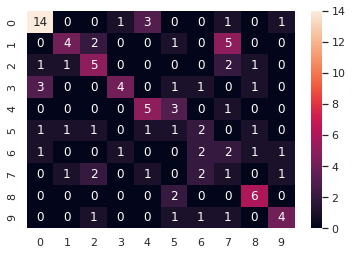

In [16]:
# Second problem
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

## Third problem
Before:
- Accuracy on training data: 100%
- Accuracy on validation data: 42%


### Experiment 1
Hyperparameter tunning (will keep 200 epochs):
- Changed 1st Conv1d layer 32 -> 64 filters
- Changed 2nd Conv1d layer 32 -> 64 filters
- Changed Dense layer units 512 -> 1024 filters

Results:
- Accuracy on training data: 100%
- Accuracy on validation data: 34%

Reasoning:
- There are twice as many parameters to train so maybe that's why it takes more time to get better results
- If num_epochs is increased, my hypothesis is that validation accuracy will increase more than 42%

### Experiment 2
Hyperparameter tunning (will keep 200 epochs):
- Changed 1st Conv1d layer 32 -> 16 filters
- Changed 2nd Conv1d layer 32 -> 16 filters
- Changed 1st Conv1d layer 32 -> 16 filters
- Changed 2nd Conv1d layer 64 -> 16 filters

Results:
- Accuracy on training data: 86%
- Accuracy on validation data: 30%

Reasoning:
- There are less parameters to train. The accuracy didn't match the previous. 

### Experiment 3
Hyperparameter tunning (will keep 200 epochs):
- Max pooling 4 -> 8

Results:
- Accuracy on training data: 86%
- Accuracy on validation data: 30%

### Experiment 4
- Added extra Conv1d layer 64 filters
- Added activation layer -> relu


Results:
- Accuracy on training data: 98%
- Accuracy on validation data: 44%

Reasoning:
- Note this way accuracy is better and training data accuracy is not perfect like before.
- Better accuracy less overfitty

### Experiment 5
Added based on Experiment 4
- Added extra Conv1d layer 64 filters
- Added activation layer -> relu


Results:
- Accuracy on training data: 97%
- Accuracy on validation data: 45%

Reasoning:
- This is even better than Experiment 4. With an extra layer there are more parameters to train, so overfitting is not that bad.
- Notice that Training accuracy 98 -> 97
- Validation accuracy 44 -> 45